<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [1]:
import numpy as np

np.random.rand(10)

np.random.rand(5, 2) #array of 5 by 2 (5 sets of 2)

#key note, all numbers are between 0 and 1

n=1000
random_numbers = np.random.rand(n)
np.sum(random_numbers<.5)/n*100

50.8

### 1.2 NumPy’s PRNG

In [2]:
n=1000
random_numbers = np.random.rand(n)
np.sum(random_numbers<.25)/n*100

n=1000
random_numbers = np.random.rand(n)
np.sum(random_numbers >.75)/n*100

np.sum((random_numbers<.25)/n*100 + (random_numbers >.75)/n*100)

51.3

### 1.3 A simple graphical test

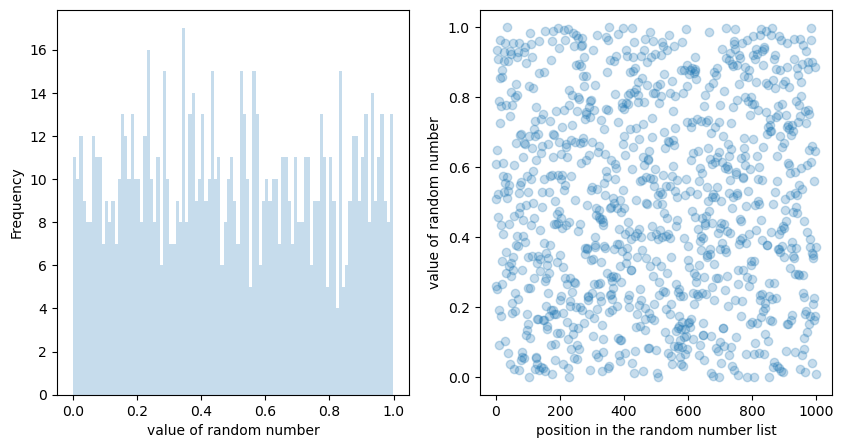

In [3]:
from matplotlib import pyplot as plt
n=1000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2, 
                      figsize = (10, 5))

axis = ax[0]
axis.hist(random_numbers, bins =100, alpha = .25)
axis.set_xlabel('value of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("position in the random number list")
axis.set_ylabel('value of random number')

plt.show()

### 1.4 Uniformly beyond \([0,1)\)

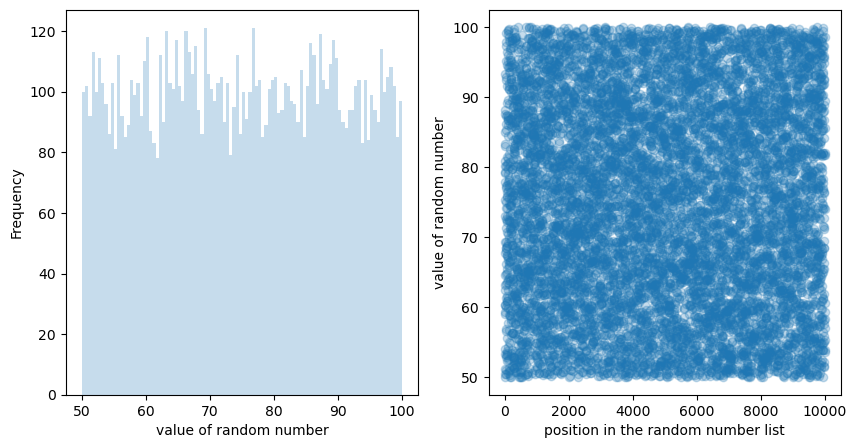

In [4]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2, 
                      figsize = (10, 5))

axis = ax[0]
axis.hist(random_numbers, bins =100, alpha = .25)
axis.set_xlabel('value of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("position in the random number list")
axis.set_ylabel('value of random number')

plt.show()

### 1.5 ‘seeding’ a PRNG

In [5]:

print(np.random.randint(0, 100, 10))
np.random.seed(1244)
print(np.random.randint(0, 100, 10))
np.random.seed(1244)
print(np.random.randint(0, 100, 10))

[73 99 81  0 20 79 47 69 11 65]
[44 80 50 23 43 34 10 48 55 85]
[44 80 50 23 43 34 10 48 55 85]


## 2 Simulating a Magic-8 Ball

In [6]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will my gacha rolls be 5*?',
            'Will I be balling in Moolah?',
            'Will I be in trouble if I dont finish 2273?']
for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will my gacha rolls be 5*?
A: Cannot predict now.

Q: Will I be balling in Moolah?
A: Without a doubt.

Q: Will I be in trouble if I dont finish 2273?
A: Signs point to yes.



## 3 Flipping Coins

### 3.1 A fair coin

In [7]:
np.random.choice(['Head', 'Tails'])

no_of_coins = 10
np.random.choice(['Head','Tails'], no_of_coins)

array(['Tails', 'Head', 'Head', 'Tails', 'Tails', 'Tails', 'Head',
       'Tails', 'Tails', 'Head'], dtype='<U5')

In [8]:
def flip_coins(no_of_coins=1, probability = .5):
    '''
    Returns the number of values greater than 
    'probability'(considered as 'Heads').
    '''
    
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results>probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'number of heads: {no_of_heads/(no_of_coins)*100:.2f}%')

number of heads: 49.80%


### 3.2 A biased coin

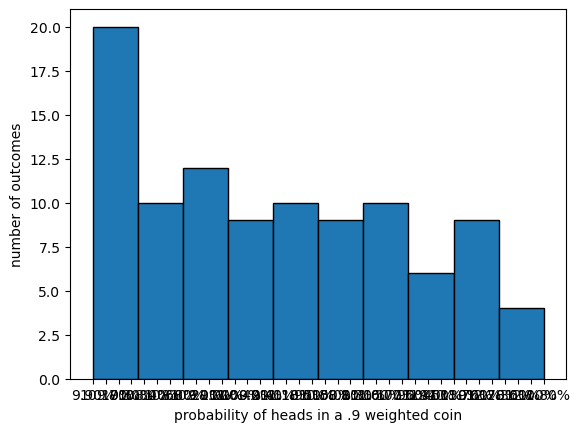

In [9]:
outcomes = []
for i in range(1, 100):
    no_of_coins = 1_000
    no_of_heads = flip_coins(no_of_coins, probability = .9)
#     print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')
    probs = f'{no_of_heads/no_of_coins *100:.2f}%'
    outcomes.append(probs)

# plotting the results from a list of outcomes

plt.hist(outcomes, edgecolor='black')
plt.ylabel('number of outcomes')
plt.xlabel('probability of heads in a .9 weighted coin')
plt.show()

### 3.3 A flipping experiment

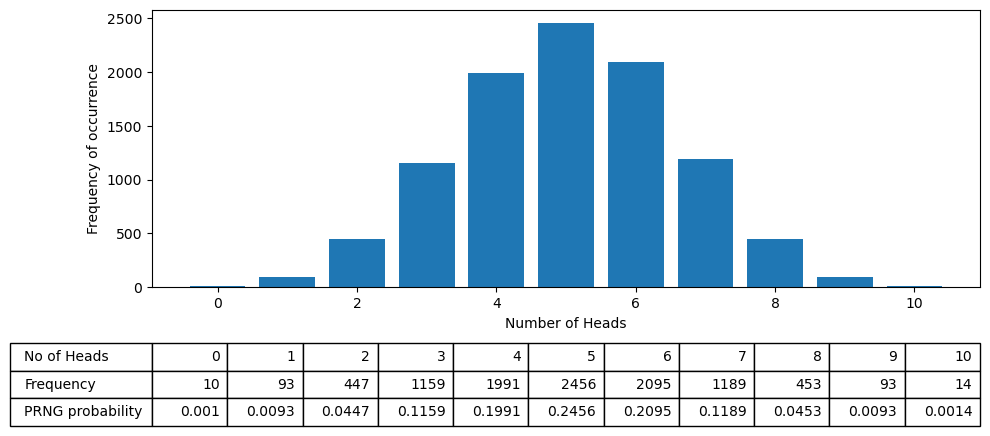

In [10]:
no_of_coins=10
no_of_repeats = 10_000
result = [flip_coins(no_of_coins) for _ in range(no_of_repeats)]
no_of_heads, heads_count = np.unique(result, return_counts=True)

heads_probability = heads_count/no_of_repeats

plt.rcParams['figure.figsize']=(10,5)
plt.bar(no_of_heads, heads_count);
plt.xlabel('Number of Heads')
plt.ylabel('Frequency of occurrence')
plt.table([no_of_heads, heads_count, heads_probability],
         rowLabels=['No of Heads', 'Frequency', 'PRNG probability'],
         loc='bottom',
         bbox = [0, -0.5, 1, 0.3])
plt.tight_layout()
plt.show()

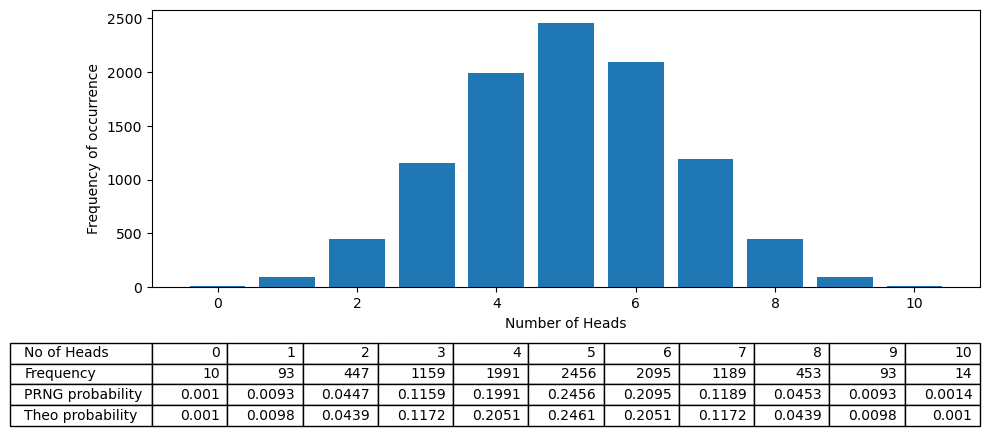

In [11]:
from scipy.stats import binom

#binomial distribution, probability of getting number of heads=7 in 10 coins with a probability of .5 per trial
binom.pmf(k=7, n=10, p=.5)

binomial_probabilities= binom.pmf(k=no_of_heads, n=10, p=.5)
binomial_probabilities = np.around(binomial_probabilities, decimals=4)

plt.rcParams['figure.figsize']=(10,5)
plt.bar(no_of_heads, heads_count);
plt.xlabel('Number of Heads')
plt.ylabel('Frequency of occurrence')
plt.table([no_of_heads, heads_count, heads_probability, binomial_probabilities],
         rowLabels=['No of Heads', 'Frequency', 'PRNG probability','Theo probability'],
         loc='bottom',
         bbox = [0, -0.5, 1, 0.3])
plt.tight_layout()
plt.show()

## Exercise 1 :  12C, 13C

1.655057702921563
2.972
0.039


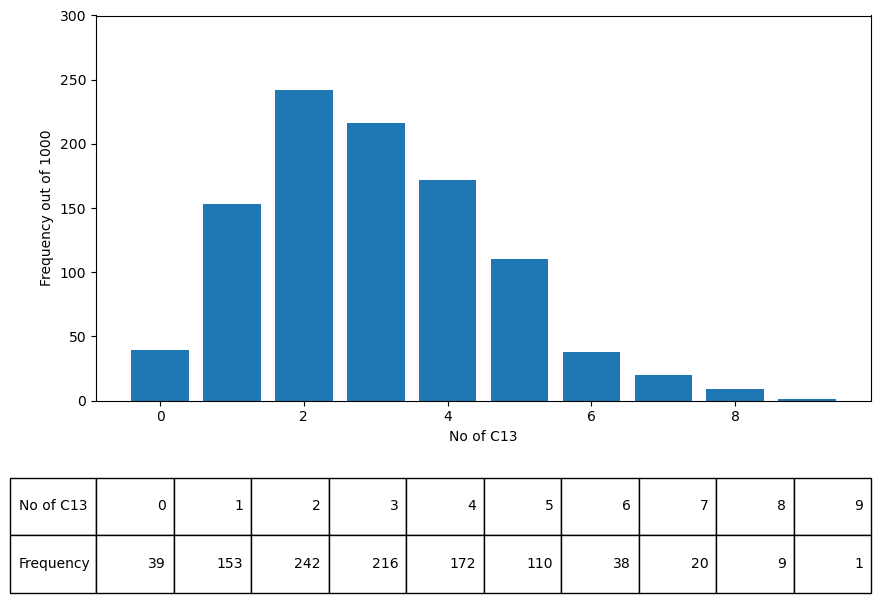

In [16]:
no_of_C_atoms = 27
no_of_cholesterol = 1000

def cholesterol_C13(no_of_C_atoms=27, probability=0.111):
    results = np.random.rand(no_of_C_atoms)
    no_of_C13 = np.sum(results<=probability)
    return no_of_C13
result = [cholesterol_C13() for _ in range(no_of_cholesterol)]
no_of_C13, C13_counts = np.unique(result, return_counts=True)

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_C13, C13_counts );
plt.xlabel('No of C13')
plt.ylabel(f'Frequency out of {no_of_cholesterol}')
plt.ylim(0, 300)
plt.table([no_of_C13, C13_counts],
          rowLabels=['No of C13', 'Frequency'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
print(np.std(result))
print(np.mean(result))

p_C13_0 = C13_counts[0]/no_of_cholesterol
print(p_C13_0)